# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# Theil-Sen Regression: The Robust Twin of Linear Regression

Post Link: [Substack](https://www.blog.dailydoseofds.com/p/theil-sen-regression-the-robust-twin)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:share:7076513224967282688/)

Twitter Post: [Twitter](https://twitter.com/_avichawla/status/1670747470463205376)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, TheilSenRegressor

sns.set()

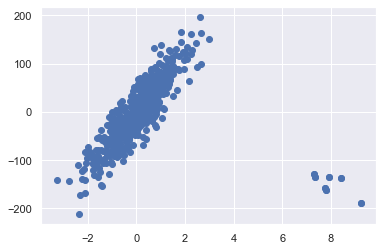

In [5]:
N_SAMPLES = 500
N_OUTLIERS = 7

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES, 
    n_features=1, 
    n_informative=1, 
    noise=30, 
    coef=True, 
#     random_state=11441
)

coef_list = [["original_coef", float(coef)]]

# add outliers               
# np.random.seed(42)
outliers_x = 8 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
outliers_y = -150 + 20 * np.random.normal(size=N_OUTLIERS)

X = np.concatenate((X, outliers_x, outliers_x))
y = np.concatenate((y, outliers_y, outliers_y))

plt.scatter(X, y);

In [6]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [7]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

In [8]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

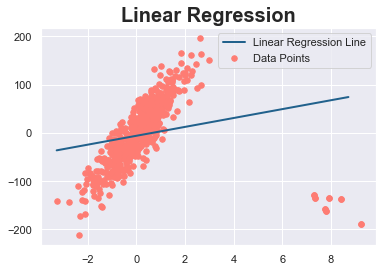

In [9]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "linear_regression", c = colors[8], lw=2, label="Linear Regression Line")
plt.scatter(X, y, c = colors[0], s = 30,  label = "Data Points")
plt.legend()
plt.title("Linear Regression", fontsize=20, fontweight = "bold")
plt.show();

In [10]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

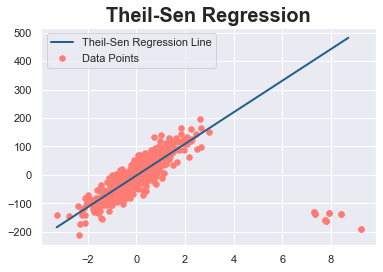

In [11]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "theilsen_regression", c = colors[8], lw=2, label="Theil-Sen Regression Line")
plt.scatter(X, y, c = colors[0], s = 30, label = "Data Points")
plt.legend()
plt.title("Theil-Sen Regression", fontsize=20, fontweight = "bold")

plt.show();